## Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import pickle


## Load the dataset into the tool

In [3]:

data=pd.read_csv("heart.csv")

## Data Preprocessing

In [4]:
data.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [5]:
data.describe

<bound method NDFrame.describe of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  seru

In [9]:
data.describe

<bound method NDFrame.describe of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  seru

In [6]:
X = data.drop("DEATH_EVENT", axis=1)
Y = data[["DEATH_EVENT"]]

## Data Standardization and Scaling

In [7]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Visualizations

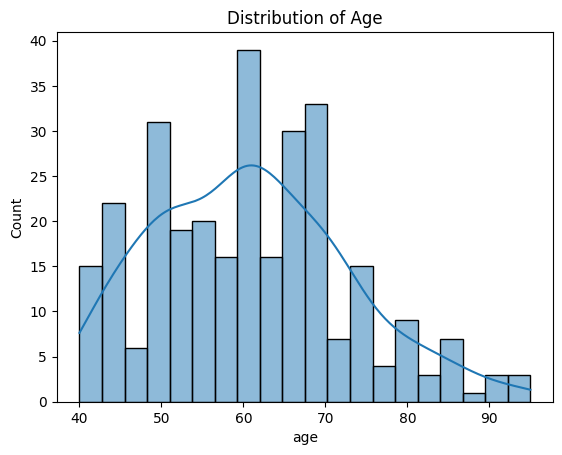

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of Age
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

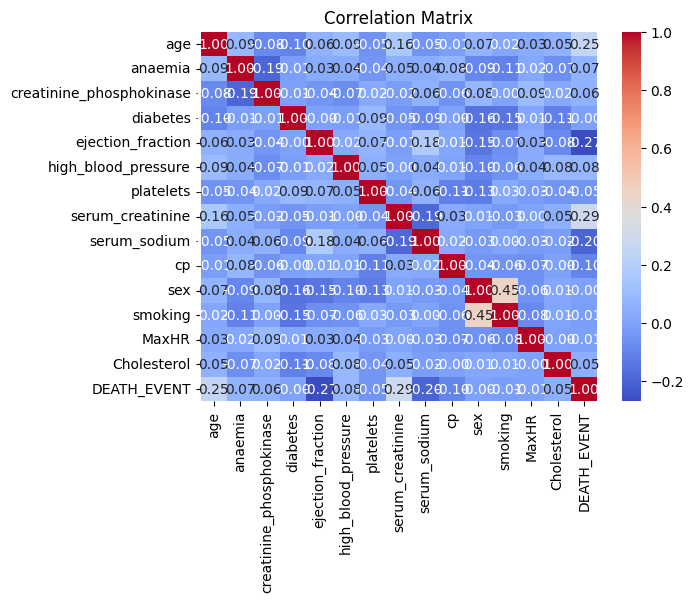

In [12]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

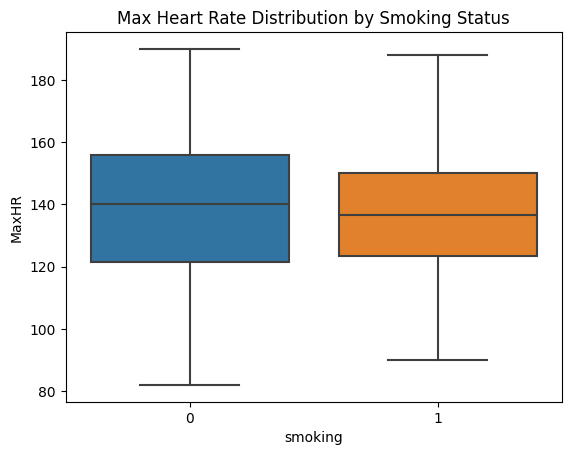

In [14]:
sns.boxplot(x='smoking', y='MaxHR', data=data)
plt.title('Max Heart Rate Distribution by Smoking Status')
plt.show()

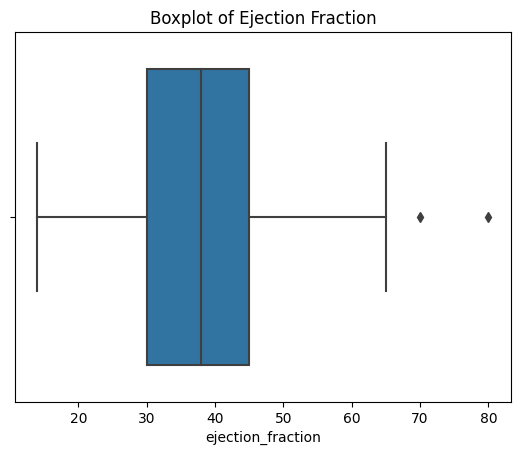

In [16]:
sns.boxplot(x='ejection_fraction', data=data)
plt.title('Boxplot of Ejection Fraction')
plt.show()

## Model Training

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=8)

In [18]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

# Train models
logistic_model.fit(X_train, Y_train)
decision_tree_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

## Model evaluation metrics

In [19]:
# Evaluation metrics for Logistic Regression
logistic_model_score = logistic_model.score(X_test, Y_test)
logistic_precision = metrics.precision_score(Y_test, logistic_model.predict(X_test)) * 100
logistic_recall = metrics.recall_score(Y_test, logistic_model.predict(X_test)) * 100
logistic_auc = metrics.roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])

# Evaluation metrics for Decision Tree
decision_tree_model_score = decision_tree_model.score(X_test, Y_test)
decision_tree_precision = metrics.precision_score(Y_test, decision_tree_model.predict(X_test)) * 100
decision_tree_recall = metrics.recall_score(Y_test, decision_tree_model.predict(X_test)) * 100
decision_tree_auc = metrics.roc_auc_score(Y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Evaluation metrics for KNN
knn_model_score = knn_model.score(X_test, Y_test)
knn_precision = metrics.precision_score(Y_test, knn_model.predict(X_test)) * 100
knn_recall = metrics.recall_score(Y_test, knn_model.predict(X_test)) * 100
knn_auc = metrics.roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:, 1])

In [22]:
print("Logistic Regression Metrics:")
print(f"  Accuracy: {logistic_model_score:.4f}")
print(f"  Precision: {logistic_precision:.2f}%")
print(f"  Recall: {logistic_recall:.2f}%")
print(f"  AUC: {logistic_auc:.4f}\n")

print("Decision Tree Metrics:")
print(f"  Accuracy: {decision_tree_model_score:.4f}")
print(f"  Precision: {decision_tree_precision:.2f}%")
print(f"  Recall: {decision_tree_recall:.2f}%")
print(f"  AUC: {decision_tree_auc:.4f}\n")

print("KNN Metrics:")
print(f"  Accuracy: {knn_model_score:.4f}")
print(f"  Precision: {knn_precision:.2f}%")
print(f"  Recall: {knn_recall:.2f}%")
print(f"  AUC: {knn_auc:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.7667
  Precision: 62.50%
  Recall: 40.00%
  AUC: 0.7502

Decision Tree Metrics:
  Accuracy: 0.6667
  Precision: 42.86%
  Recall: 60.00%
  AUC: 0.6462

KNN Metrics:
  Accuracy: 0.6778
  Precision: 16.67%
  Recall: 4.00%
  AUC: 0.5142


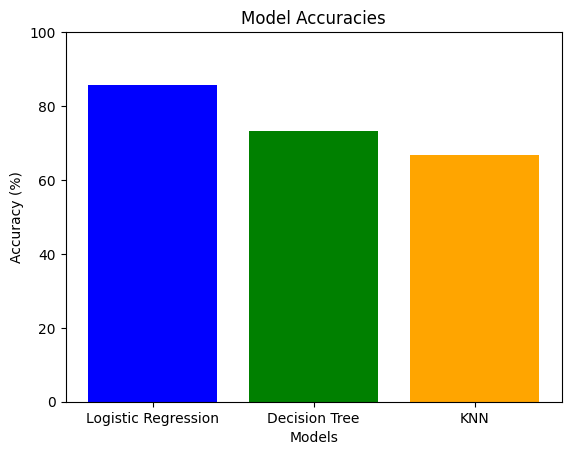

In [23]:
import matplotlib.pyplot as plt

# Comparison of model accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']
model_accuracies = [85.56, 73.33, 66.67]

plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()